## 2 Output, MLP ve Keras Çalışması

In [1]:
import numpy as np
import pandas as pd


In [2]:
#https://www.kaggle.com/jakeshbohaju/brain-tumor

df=pd.read_csv("Brain Tumor.csv")
print(df.head())

print(df.info())
# verisetine genel bakış, eksik veri yok.

    Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e

In [3]:

print(df.shape)

(3762, 15)


In [4]:
print(df.dtypes) # veri tipleri istenilen durumda, int ve float halinde. Image sütununda görüntüler adlandırılmış, sütun silinebilir.

Image                  object
Class                   int64
Mean                  float64
Variance              float64
Standard Deviation    float64
Entropy               float64
Skewness              float64
Kurtosis              float64
Contrast              float64
Energy                float64
ASM                   float64
Homogeneity           float64
Dissimilarity         float64
Correlation           float64
Coarseness            float64
dtype: object


In [5]:
print(df.describe())

             Class         Mean     Variance  Standard Deviation      Entropy  \
count  3762.000000  3762.000000  3762.000000         3762.000000  3762.000000   
mean      0.447368     9.488890   711.101063           25.182271     0.073603   
std       0.497288     5.728022   467.466896            8.773526     0.070269   
min       0.000000     0.078659     3.145628            1.773592     0.000882   
25%       0.000000     4.982395   363.225459           19.058475     0.006856   
50%       0.000000     8.477531   622.580417           24.951560     0.066628   
75%       1.000000    13.212723   966.954319           31.095889     0.113284   
max       1.000000    33.239975  2910.581879           53.949809     0.394539   

          Skewness     Kurtosis     Contrast       Energy          ASM  \
count  3762.000000  3762.000000  3762.000000  3762.000000  3762.000000   
mean      4.102727    24.389071   127.961459     0.204705     0.058632   
std       2.560940    56.434747   109.499601    

In [6]:
# özellik seçimi, Image sütunu object tipinde olduğu ve önemli bir bilgi içermediği için silindi.

df.drop(["Image"],axis=1,inplace = True)

In [7]:
#tekrarlayan veri bulunmamaktadır.
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3732    False
3733    False
3734    False
3735    False
3736    False
3737    False
3738    False
3739    False
3740    False
3741    False
3742    False
3743    False
3744    False
3745    False
3746    False
3747    False
3748    False
3749    False
3750    False
3751    False
3752    False
3753    False
3754    False
3755    False
3756    False
3757    False
3758    False
3759    False
3760    False
3761    False
Length: 3762, dtype: bool


In [8]:
# Class sütununda görüntüde tümör olup olmadığını tanımlıdır (1= tümör ve 0=tümör olmayan). 0 ve 1 sınıflarında kaçar tane görüntü bulunduğuna bakıldı.
df['Class'].value_counts()

0    2079
1    1683
Name: Class, dtype: int64

In [9]:
df.to_csv("Brain TumorLast.csv") #üzerinde değişiklik yapılan veriseti yeniden kaydedildi.

## MLP

In [10]:
# verisetinin son hali okundu x ve y tanımlandı.
df=pd.read_csv("Brain TumorLast.csv")
y=df.Class.values
x_data=df.drop(["Class"],axis=1).values
x=x_data


In [11]:
#eğitim ve test verisetinin oluşturulması
#Öğrenme veri kümesini küçük tutarak sonuçların çok iyi olmasını engellenmektedir.
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [12]:
from sklearn.neural_network import MLPClassifier

mlpc=MLPClassifier(random_state=1)
mlpc.fit(x_train,y_train)
#eğitim setinin ysa ya uydurulması için fit() fonksiyonu kullanılmaktadır.

#random_state değeri sonuçların her seferinde aynı çıkmasını sağlamak için kullanılıyor.

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [13]:
print("score:",mlpc.score(x_test,y_test))

score: 0.7410358565737052


## grid search

In [14]:
from sklearn.model_selection import GridSearchCV

mlpc_params={"alpha":[0.1,0.01,0.001,0.0001],
            "hidden_layer_sizes":[(50,50,50),(100,50),(100,50,50),(25,25,25)],
            "solver":["lbfgs","adam","sgd"]}
        

mlpc=MLPClassifier(activation="logistic",random_state=1) #2 outputlu veriseti olduğu için logistic fonksiyonu seçildi.

mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.7min finished


In [15]:
print(mlpc_cv_model.best_params_) #en uygun parametreler seçildi

{'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}


In [16]:
mlpc_tuned=MLPClassifier(alpha=0.001,hidden_layer_sizes=(100,50),solver="adam").fit(x_train,y_train)
print("score:",mlpc_tuned.score(x_test,y_test))
#en iyi uygun parametler ile skor  0.7410358565737052'den 0.7675962815405046'a çıkarıldı. 

score: 0.7675962815405046


## k-fold cross validation

In [22]:
#k-fold cross validation ile uygun iterasyon sayısının belirlenmesi için kullanıldı.
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

scores=[]

kf=KFold(n_splits=10,random_state=1)
mlpc=MLPClassifier(solver="adam",activation="logistic",hidden_layer_sizes=(100,50))

for train_indexler,test_indexler in kf.split(x):
    mlpc.fit(x[train_indexler],y[train_indexler])
    score=mlpc.score(x[test_indexler],y[test_indexler])
    scores.append(score)
    print(score)
    
print("ortalama score:",np.mean(scores))
#n_splits=3 ortalama score: 0.880648591174907
#n_splits=5 ortalama score: 0.8891748608403267
#n_splits=7 ortalama score: 0.8902025473436244
#n_splits=10 ortalama score: ortalama score: 0.9362224166149332


#en yüksek skoru n_splits=10 değerinde verdiği için iterasyon sayısı 10 seçildi.

0.8594164456233422
0.9442970822281167
0.9069148936170213
0.9441489361702128
0.9547872340425532
0.9601063829787234
0.9414893617021277
0.949468085106383


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.949468085106383
0.9521276595744681
ortalama score: 0.9362224166149332


## değerlendirme

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [24]:
import sklearn.metrics as metrics

y_pred=mlpc.predict(x_test)

In [25]:
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.9734395750332006


In [26]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[433   6]
 [ 14 300]]


In [27]:
f1=metrics.f1_score(y_test,y_pred)
print("f1 score:",f1)

f1 score: 0.9677419354838711


In [28]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       439
           1       0.98      0.96      0.97       314

   micro avg       0.97      0.97      0.97       753
   macro avg       0.97      0.97      0.97       753
weighted avg       0.97      0.97      0.97       753



In [29]:
#roc and auc
probs=mlpc.predict_proba(x_test)
#print(probs)
probs=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,probs)
auc_value=metrics.auc(fpr,tpr)

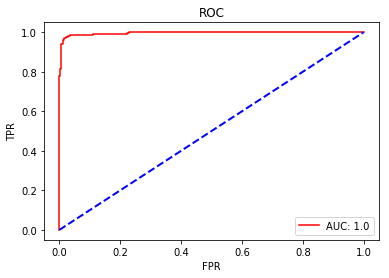

In [30]:

plt.title("ROC")
plt.plot(fpr,tpr,label="AUC: "+str(round(auc_value,2)),color="red")
plt.plot([0,1],[0,1],color="blue",lw=2,linestyle="--")
plt.legend(loc="lower right")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

## seaborn

In [31]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

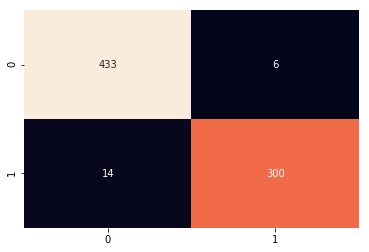

In [32]:
sns.heatmap(cm,cbar=False,annot=True,fmt="")

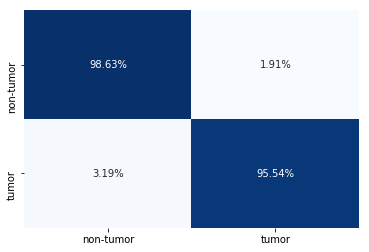

In [33]:
class_adlari=["non-tumor","tumor"]
sns.heatmap(cm/cm.sum(axis=1), annot=True, cbar=False, cmap="Blues",xticklabels=class_adlari,yticklabels=class_adlari,fmt=".2%")

## Keras

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D,MaxPool2D,BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("Brain TumorLast.csv")



In [3]:
y=df.Class.values
x_data=df.drop(["Class"],axis=1).values
x=x_data

In [4]:
x=x.reshape(x.shape[0],x.shape[1])
print(x.shape)

(3762, 14)


In [5]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [6]:
input_shape=x_train[0].shape
print(input_shape)

(14,)


In [7]:
model = Sequential()
model.add(Dense(40,activation='relu',input_shape=input_shape))
model.add(BatchNormalization())

model.add(Dense(80,activation='sigmoid',input_shape=input_shape))
model.add(BatchNormalization())

model.add(Dense(160,activation='relu',input_shape=input_shape))
model.add(BatchNormalization())

model.add(Dense(2, activation='softmax',input_shape=input_shape))

In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [9]:
egitim=model.fit(x_train,y_train,epochs=300,validation_data=(x_test,y_test))

Epoch 1/300
95/95 [==============================] - 0s 4ms/step - loss: 0.6162 - accuracy: 0.7099 - val_loss: 0.6206 - val_accuracy: 0.7477
Epoch 2/300
95/95 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.7979 - val_loss: 0.5783 - val_accuracy: 0.6826
Epoch 3/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3661 - accuracy: 0.8421 - val_loss: 0.4823 - val_accuracy: 0.7809
Epoch 4/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8578 - val_loss: 0.3429 - val_accuracy: 0.8579
Epoch 5/300
95/95 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.8548 - val_loss: 0.3159 - val_accuracy: 0.8632
Epoch 6/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8750 - val_loss: 0.4444 - val_accuracy: 0.8088
Epoch 7/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3014 - accuracy: 0.8787 - val_loss: 0.2926 - val_accuracy: 0.8858
Epoch 8/300
9

Epoch 59/300
95/95 [==============================] - 0s 2ms/step - loss: 0.1280 - accuracy: 0.9538 - val_loss: 0.2839 - val_accuracy: 0.9057
Epoch 60/300
95/95 [==============================] - 0s 2ms/step - loss: 0.1344 - accuracy: 0.9488 - val_loss: 0.8464 - val_accuracy: 0.8260
Epoch 61/300
95/95 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9538 - val_loss: 0.0763 - val_accuracy: 0.9695
Epoch 62/300
95/95 [==============================] - 0s 2ms/step - loss: 0.1226 - accuracy: 0.9541 - val_loss: 1.4591 - val_accuracy: 0.6056
Epoch 63/300
95/95 [==============================] - 0s 2ms/step - loss: 0.1485 - accuracy: 0.9425 - val_loss: 0.4930 - val_accuracy: 0.8114
Epoch 64/300
95/95 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.9545 - val_loss: 0.1783 - val_accuracy: 0.9203
Epoch 65/300
95/95 [==============================] - 0s 2ms/step - loss: 0.1154 - accuracy: 0.9548 - val_loss: 0.1746 - val_accuracy: 0.9283
Epoch 

95/95 [==============================] - 0s 2ms/step - loss: 0.0961 - accuracy: 0.9661 - val_loss: 0.3662 - val_accuracy: 0.8765
Epoch 117/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0855 - accuracy: 0.9668 - val_loss: 0.1814 - val_accuracy: 0.9336
Epoch 118/300
95/95 [==============================] - 0s 1ms/step - loss: 0.0865 - accuracy: 0.9661 - val_loss: 0.2497 - val_accuracy: 0.9230
Epoch 119/300
95/95 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.9711 - val_loss: 0.3213 - val_accuracy: 0.9044
Epoch 120/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 0.9661 - val_loss: 0.1240 - val_accuracy: 0.9748
Epoch 121/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0966 - accuracy: 0.9644 - val_loss: 0.9582 - val_accuracy: 0.8406
Epoch 122/300
95/95 [==============================] - 0s 1ms/step - loss: 0.0870 - accuracy: 0.9668 - val_loss: 0.2793 - val_accuracy: 0.9137
Epoch 123/300

95/95 [==============================] - 0s 2ms/step - loss: 0.0845 - accuracy: 0.9714 - val_loss: 2.8657 - val_accuracy: 0.6853
Epoch 174/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0894 - accuracy: 0.9681 - val_loss: 0.2014 - val_accuracy: 0.9615
Epoch 175/300
95/95 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.9614 - val_loss: 0.4805 - val_accuracy: 0.8805
Epoch 176/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0689 - accuracy: 0.9764 - val_loss: 2.1552 - val_accuracy: 0.6972
Epoch 177/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0786 - accuracy: 0.9721 - val_loss: 0.1508 - val_accuracy: 0.9894
Epoch 178/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9704 - val_loss: 0.1930 - val_accuracy: 0.9681
Epoch 179/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0728 - accuracy: 0.9694 - val_loss: 0.1163 - val_accuracy: 0.9854
Epoch 180/300

95/95 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9784 - val_loss: 0.6044 - val_accuracy: 0.8300
Epoch 231/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9774 - val_loss: 0.2953 - val_accuracy: 0.9402
Epoch 232/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 0.9698 - val_loss: 0.1828 - val_accuracy: 0.9814
Epoch 233/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0717 - accuracy: 0.9754 - val_loss: 0.2249 - val_accuracy: 0.9456
Epoch 234/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9794 - val_loss: 0.0848 - val_accuracy: 0.9894
Epoch 235/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9817 - val_loss: 1.0830 - val_accuracy: 0.7610
Epoch 236/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 0.9781 - val_loss: 0.3439 - val_accuracy: 0.9070
Epoch 237/300

95/95 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9814 - val_loss: 0.2593 - val_accuracy: 0.9602
Epoch 288/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0731 - accuracy: 0.9734 - val_loss: 0.9563 - val_accuracy: 0.8606
Epoch 289/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9761 - val_loss: 0.3610 - val_accuracy: 0.9190
Epoch 290/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9777 - val_loss: 0.2142 - val_accuracy: 0.9522
Epoch 291/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9727 - val_loss: 0.1256 - val_accuracy: 0.9920
Epoch 292/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9811 - val_loss: 0.2186 - val_accuracy: 0.9827
Epoch 293/300
95/95 [==============================] - 0s 2ms/step - loss: 0.0582 - accuracy: 0.9781 - val_loss: 0.2272 - val_accuracy: 0.9774
Epoch 294/300

In [10]:
import matplotlib.pyplot as plt
plt.plot(egitim.history["acc"])
plt.plot(egitim.history["val_acc"])
plt.show()

KeyError: 'acc'